In [1]:
import CellScopes as cs

WebIO._IJuliaInit()

Welcome to use CellScopes.jl!


In [2]:
kidney = cs.read_visium("human_visium/")

VisiumObject in CellScopes.jl


Genes x Cells = 18065 x 5936
Available data:
- rawCount
- metaData
- spmetaData
- imageData
All fields:
- rawCount
- normCount
- scaleCount
- metaData
- spmetaData
- varGene
- dimReduction
- clustData
- imageData


In [3]:
@time kidney = cs.add_full_res_img(kidney, "/home/haojiawu/CytAssist_11mm_FFPE_Human_Kidney_tissue_image.png")

 55.126509 seconds (418.17 k allocations: 11.728 GiB, 0.11% gc time, 0.50% compilation time)


VisiumObject in CellScopes.jl


Genes x Cells = 18065 x 5936
Available data:
- rawCount
- metaData
- spmetaData
- imageData
All fields:
- rawCount
- normCount
- scaleCount
- metaData
- spmetaData
- varGene
- dimReduction
- clustData
- imageData


In [4]:
kidney = cs.normalize_object(kidney; scale_factor = 10000)
kidney = cs.scale_object(kidney)
kidney = cs.find_variable_genes(kidney; nFeatures = 1000)
kidney = cs.run_pca(kidney;  method=:svd, pratio = 1, maxoutdim = 10)
kidney = cs.run_umap(kidney; min_dist=0.2, n_neighbors=10)
kidney = cs.run_clustering(kidney; res=0.0008, n_neighbors=10)

VisiumObject in CellScopes.jl


Genes x Cells = 18065 x 5936
Available data:
- rawCount
- normCount
- scaleCount
- metaData
- spmetaData
- varGene
- dimReduction
- clustData
- imageData
All fields:
- rawCount
- normCount
- scaleCount
- metaData
- spmetaData
- varGene
- dimReduction
- clustData
- imageData


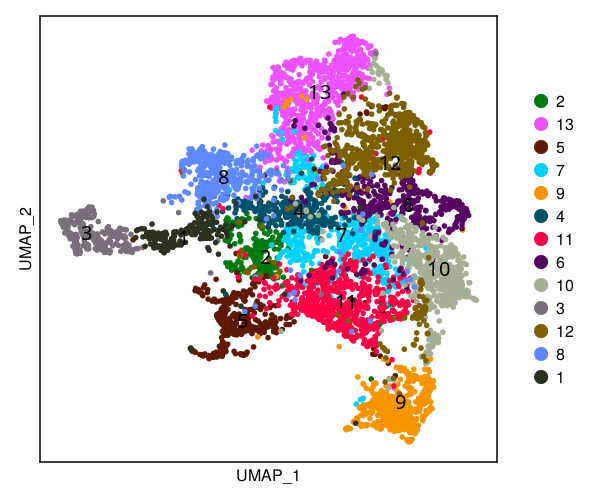

In [9]:
kidney = cs.run_clustering(kidney; res=0.002, n_neighbors=10)
cs.dim_plot(kidney; dim_type ="umap", marker_size=8)

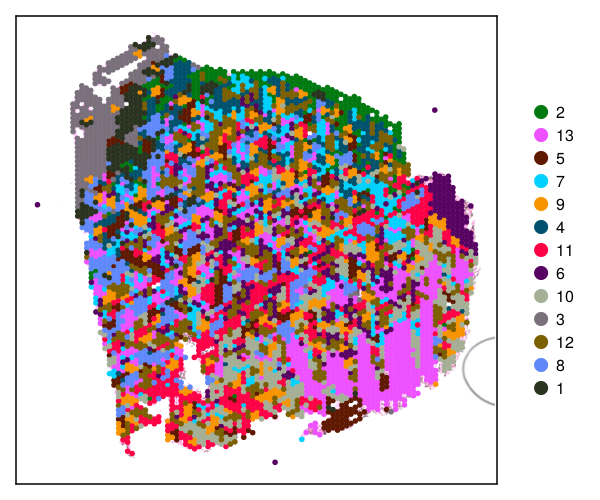

In [10]:
cs.sp_dim_plot(kidney, "cluster"; 
    marker_size = 8, canvas_size = (600,500), 
    do_label=false)

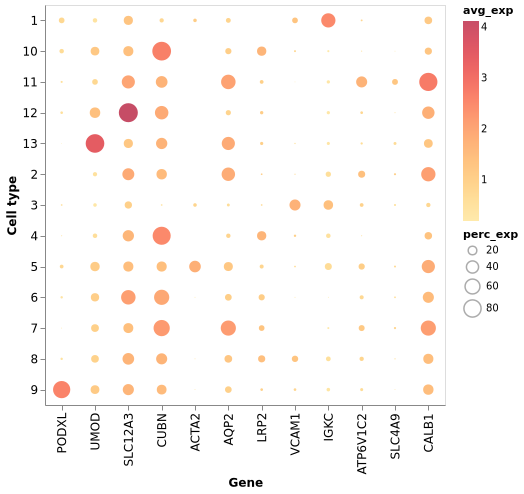

In [11]:
cs.dot_plot(kidney, ["PODXL","UMOD","SLC12A3","CUBN", "ACTA2", 
        "AQP2", "LRP2", "VCAM1","IGKC","ATP6V1C2","SLC4A9","CALB1"], "cluster"; expr_cutoff=2)

In [12]:
clusters = string.(collect(1:13))
celltype = ["Immune","Immune","Fib","PT","TAL","IC","PT","TAL","Podo","PT","PC","PT","DCT"]
cell_map = Dict(clusters .=> celltype)
kidney.spmetaData.cluster = kidney.metaData.cluster;
kidney = cs.annotate_cells(kidney, cell_map)

VisiumObject in CellScopes.jl


Genes x Cells = 18065 x 5936
Available data:
- rawCount
- normCount
- scaleCount
- metaData
- spmetaData
- varGene
- dimReduction
- clustData
- imageData
All fields:
- rawCount
- normCount
- scaleCount
- metaData
- spmetaData
- varGene
- dimReduction
- clustData
- imageData


In [17]:
colors =["purple","dodgerblue1","yellow","green1","magenta","cyan","darkgreen","blue"]
celltypes = unique(kidney.spmetaData.celltype)
anno_color=Dict(celltypes .=> colors)

Dict{String, String} with 8 entries:
  "Immune" => "darkgreen"
  "IC"     => "purple"
  "Fib"    => "yellow"
  "TAL"    => "dodgerblue1"
  "PT"     => "green1"
  "Podo"   => "magenta"
  "PC"     => "cyan"
  "DCT"    => "blue"

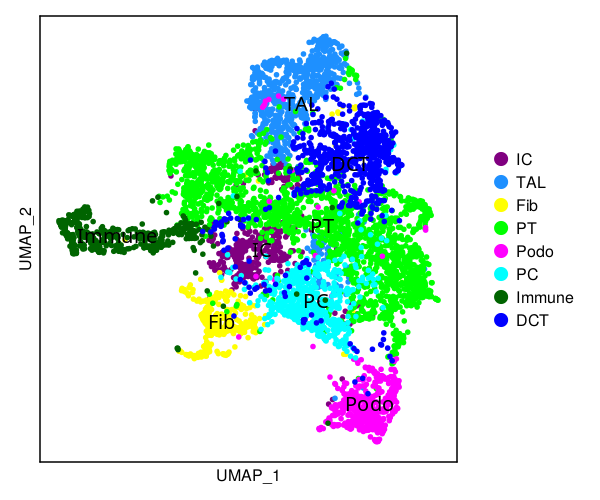

In [18]:
cs.dim_plot(kidney; anno="celltype", dim_type ="umap", marker_size=8, anno_color=anno_color)

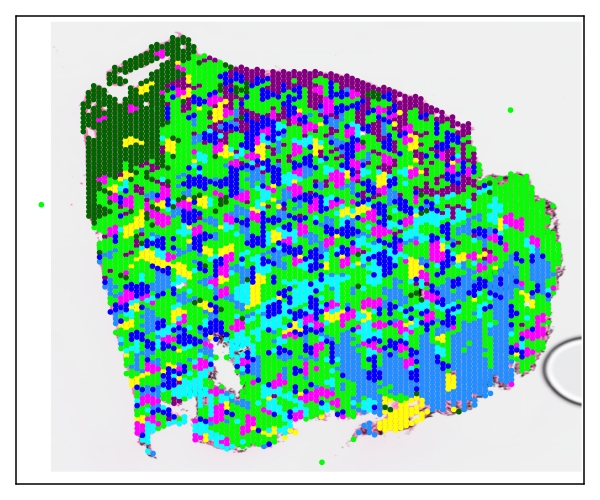

In [19]:
colors =["purple","dodgerblue1","yellow","green1","magenta","cyan","darkgreen","blue"]
celltypes = unique(kidney.spmetaData.celltype)
anno_color=Dict(celltypes .=> colors)
cs.sp_dim_plot(kidney, "celltype"; anno_color = anno_color,
    marker_size = 8, canvas_size = (600,500), 
    do_label=false, do_legend=false, alpha=1, adjust_contrast=1, adjust_brightness=0)

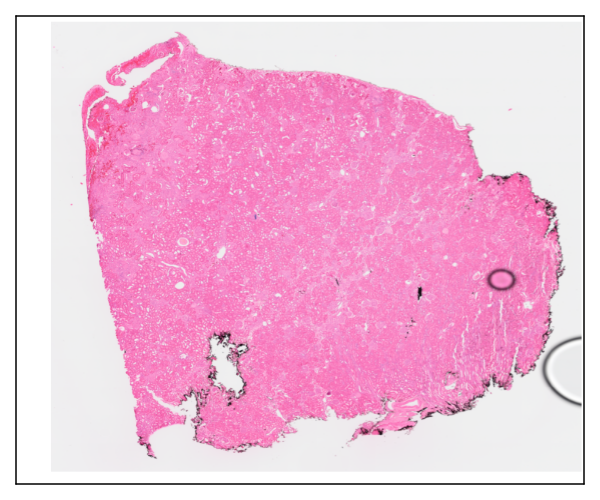

In [30]:
colors =["purple","dodgerblue1","yellow","green1","magenta","cyan","darkgreen","blue"]
celltypes = unique(kidney.spmetaData.celltype)
anno_color=Dict(celltypes .=> colors)
cs.sp_dim_plot(kidney, "celltype"; anno_color = anno_color,
    marker_size = 8, canvas_size = (600,500), 
    do_label=false, do_legend=false, alpha=0, adjust_contrast=1, adjust_brightness=0)

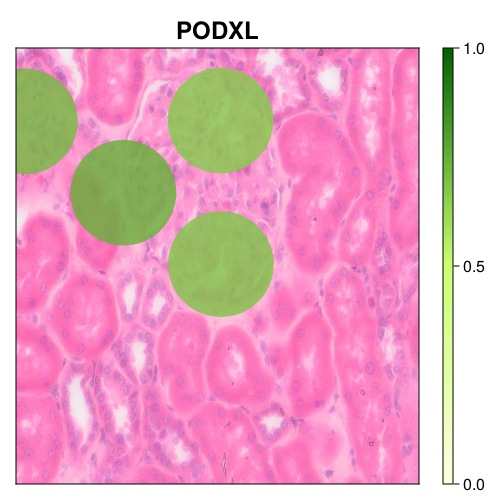

In [22]:
scale_factor = 1
cs.sp_feature_plot(kidney, ["PODXL"]; 
    marker_size = 150, color_keys=["lightyellow1", "darkolivegreen1" ,"darkgreen"], 
    adjust_contrast=1, adjust_brightness = 0, scale=true, alpha=[0,0.8],
    height=500, width=500,img_res="full", clip=0.5,
    x_lims=(18700, 20000), 
    y_lims=(9330, 10440)
)